# Модель машиннго обучения - LinearRegression()!!!

In [25]:
import pandas as pd # работа с данными / python data analysis library
import numpy as np # работа с числовыми данными / python numerical computing library
import seaborn as sns # визуализация данных / python data visualization library
import matplotlib.pyplot as plt # визуализация данных / python data visualization library
%matplotlib inline

from sklearn.linear_model import LinearRegression # линейная регрессия

from sklearn.metrics import mean_absolute_error # метрика средняя абсолютная ошибка / mean absolute error
from sklearn.metrics import mean_squared_error # метрика средняя квадратичная ошибка / mean squared error
from sklearn.metrics import mean_absolute_percentage_error # метрика средняя абсолютная процентная ошибка / mean absolute percentage error

from sklearn.model_selection import train_test_split # разделение выборки на обучающую и тестовую / train_test_split
from sklearn.feature_selection import SelectKBest, f_regression # алгоритм для выбора признаков с наивысшими оценками в модели машинного обучения на основе статистических тестов / f-regression одномерный тест линейной регрессии  
from sklearn.preprocessing import MinMaxScaler # алгоритм стандартизации данных / MinMaxScaler

from joblib import dump, load

# отключаем предупреждения
import warnings 
warnings.filterwarnings("ignore")

In [26]:
%%time 
# фиксируем RANDOM_SEED, для воспроизводимости кода
RANDOM_SEED = 369

# загружаем данные
data_lr = pd.read_csv("data/data_final.csv", sep=",")

# создаем матрицу наблюдений и вектор правильных ответов
X = data_lr.drop(columns="target", axis=1)
y = data_lr["target"]

# производим разделение выборки на тренировочную, валидационную и тестовую
X_train, X_validtest, y_train, y_validtest = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)
X_valid, X_test, y_valid, y_test = train_test_split(X_validtest, y_validtest, test_size=0.5, random_state=RANDOM_SEED)

# # производим отбор наиболее важных признаков
# selector = SelectKBest(score_func=f_regression, k=75)
# selector.fit(X_train, y_train)
# best_features = selector.get_feature_names_out()
# X_train = X_train[best_features]
# X_valid = X_valid[best_features]
# X_test = X_test[best_features]

# производим нормализацию признаков с помощью MinMaxScaller
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_valid = min_max_scaler.transform(X_valid)
X_test = min_max_scaler.transform(X_test)

# строим и обучаем модель
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# делаем предсказание
y_train_predict_lr = model_lr.predict(X_train)
y_valid_predict_lr = model_lr.predict(X_valid)
y_test_predict_lr = model_lr.predict(X_test)

# выводим метрики оценки качества
print()
print("Тренировочная выборка:")
print('     RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_predict_lr))))
print('     MAE: {:.2f}'.format(mean_absolute_error(y_train, y_train_predict_lr)))
print('     MAPE: {:.2f}%'.format(mean_absolute_percentage_error(y_train, y_train_predict_lr)*100))
print("Валидационная выборка:")
print('     RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_valid, y_valid_predict_lr))))
print('     MAE: {:.2f}'.format(mean_absolute_error(y_valid, y_valid_predict_lr)))
print('     MAPE: {:.2f}%'.format(mean_absolute_percentage_error(y_valid, y_valid_predict_lr)*100))
print("Тестовая выборка:")
print('     RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_test_predict_lr))))
print('     MAE: {:.2f}'.format(mean_absolute_error(y_test, y_test_predict_lr)))
print('     MAPE: {:.2f}%'.format(mean_absolute_percentage_error(y_test, y_test_predict_lr)*100))
# print(f"Коэффициент пересечения модели:, {model_lr.intercept_}")
# print(f"Коэффициенты модели: {model_lr.coef_}")


Тренировочная выборка:
     RMSE: 0.54
     MAE: 0.40
     MAPE: 3.16%
Валидационная выборка:
     RMSE: 0.54
     MAE: 0.40
     MAPE: 3.17%
Тестовая выборка:
     RMSE: 0.54
     MAE: 0.40
     MAPE: 3.18%
CPU times: user 35.6 s, sys: 3.34 s, total: 38.9 s
Wall time: 10.1 s


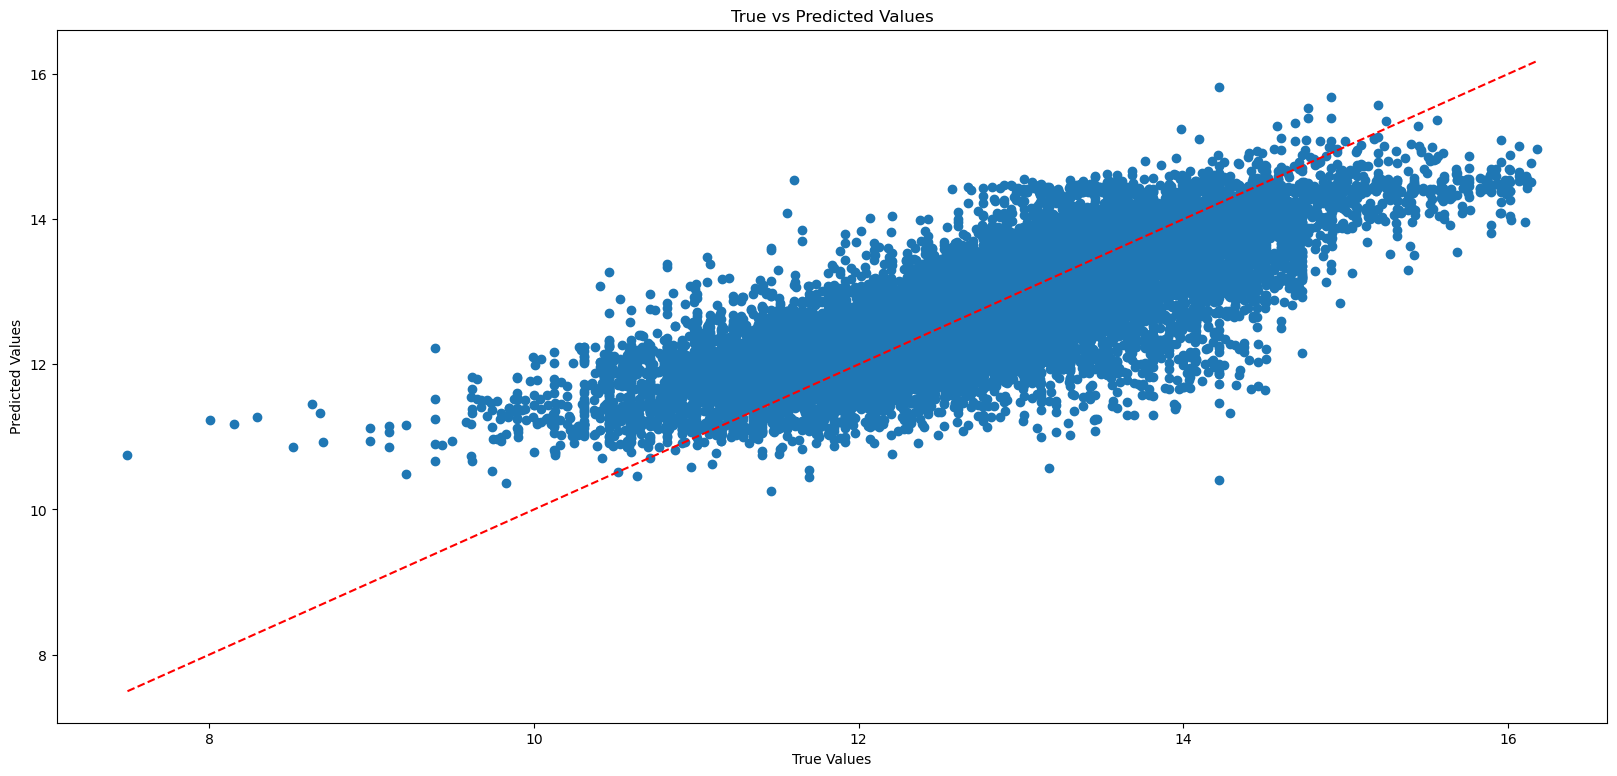

In [27]:
# график предсказанных значений против истинных значений на тестовой выборке
plt.figure(figsize=(20, 9))
plt.scatter(y_test, y_test_predict_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

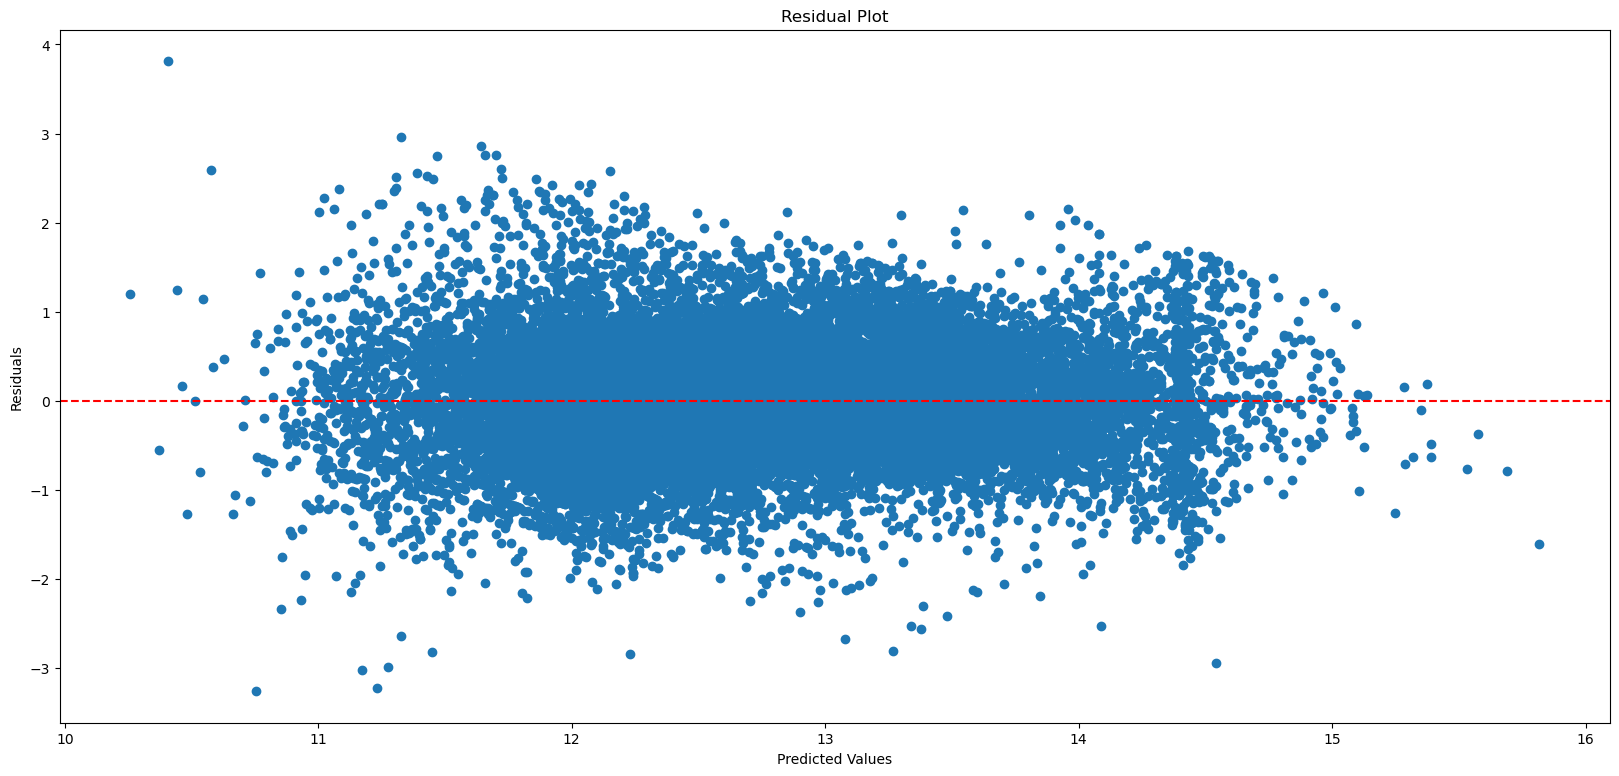

In [28]:
# график остатков на тестовой выборке
residuals = y_test - y_test_predict_lr
plt.figure(figsize=(20, 9))
plt.scatter(y_test_predict_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [29]:
# cохраняем модель в файл
dump(model_lr, "model/model_LinearRegression.joblib")

['model/model_LinearRegression.joblib']

In [30]:
# в данную переменную буду сохранять результаты моделей [RSME, MAE, MAPE и название алгоритма]
results = []

# описываем функцию для оценки модели, а также для сохранения значений метрик и последующего использования
def results_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test, model_name, results):
  """Функция для вывода результатов score для train, valid и test, а также для сохранения этих значений для последующего использования.
    
  Аргументы:
    model (model): обученная модель, которую необходимо оценить;
    model_name (string): название используемой модели.
  """
  model_result = []
  # предсказания и оценка для тренировочных данных
  y_train = np.expm1(y_train)
  y_train_pred = np.expm1(model.predict(X_train))
  RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round(3)
  MAE_train = mean_absolute_error(y_train, y_train_pred).round(3)
  MAPE_train = (mean_absolute_percentage_error(y_train, y_train_pred) * 100).round(3)
  # вывод результатов для тренировочных данных
  # print(f"Тренировочная выборка:")
  # print(f"    RMSE: {RMSE_train:.3f}")
  # print(f"    MAE: {MAE_train:.3f}")
  # print(f"    MAPE: {MAPE_train:.2f}%")
  
  # предсказания и оценка для валидационных данных
  y_valid = np.expm1(y_valid)
  y_valid_pred = np.expm1(model.predict(X_valid))
  RMSE_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred)).round(3)
  MAE_valid = mean_absolute_error(y_valid, y_valid_pred).round(3)
  MAPE_valid = (mean_absolute_percentage_error(y_valid, y_valid_pred) * 100).round(3)
  # вывод результатов для валидационных данных
  # print(f"Валидная выборка:")
  # print(f"    RMSE: {RMSE_valid:.3f}")
  # print(f"    MAE: {MAE_valid:.3f}")
  # print(f"    MAPE: {MAPE_valid:.2f}%")
  
  # предсказания и оценка для тестовых данных
  y_test = np.expm1(y_test)
  y_test_pred = np.expm1(model.predict(X_test))
  RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round(3)
  MAE_test = mean_absolute_error(y_test, y_test_pred).round(3)
  MAPE_test = (mean_absolute_percentage_error(y_test, y_test_pred) * 100).round(3)
  # вывод результатов для тестовых данных
  # print(f"Тестовая выборка:")
  # print(f"    RMSE: {RMSE_test:.3f}")
  # print(f"    MAE: {MAE_test:.3f}")
  # print(f"    MAPE: {MAPE_test:.2f}%") 
  
  # сохранение результатов в список model_results
  results.append({
      "RMSE_train": RMSE_train, "MAE_train": MAE_train, "MAPE_train": MAPE_train,
      "RMSE_valid": RMSE_valid, "MAE_valid": MAE_valid, "MAPE_valid": MAPE_valid,
      "RMSE_test": RMSE_test, "MAE_test": MAE_test, "MAPE_test": MAPE_test, 
      "ML_model": model_name
    })
  
  # сохранение результатов в список model_results
  model_result.append({
      "RMSE_train": RMSE_train, "MAE_train": MAE_train, "MAPE_train": MAPE_train,
      "RMSE_valid": RMSE_valid, "MAE_valid": MAE_valid, "MAPE_valid": MAPE_valid,
      "RMSE_test": RMSE_test, "MAE_test": MAE_test, "MAPE_test": MAPE_test, 
      "ML_model": model_name
    })
  
  # создаем dataframe с результатами
  resultmodelScoreData = pd.DataFrame(model_result).set_index('ML_model').sort_values(by='MAPE_test', ascending=True)
  # выводим сводную информацию 
  display(resultmodelScoreData.sort_values(by="MAE_test", ascending=True).round(2))

In [31]:
# делаем предсказания на тренировочной, валидной и тестовой выборках и выводим результат
print("Модель LinearRegression():")
results_model(model_lr, X_train, y_train, X_valid, y_valid, X_test, y_test, "LinearRegression()", results)

Модель LinearRegression():


,RMSE_train,MAE_train,MAPE_train,RMSE_valid,MAE_valid,MAPE_valid,RMSE_test,MAE_test,MAPE_test
ML_model,,,,,,,,,
LinearRegression(),478059.4,201245.0,44.97,491186.75,206751.32,44.84,502549.72,206034.43,45.11
